# Tensorflow 2.0 Tutorial

## Basic Tensorflow Operations

In [1]:
import tensorflow as tf


print("tensorflow version:", tf.__version__)


tensorflow version: 2.15.0


In [2]:
# Create a constant tensor A
A = tf.constant([[1, 2], [3, 4]])
A

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [3]:
# Create a Variable tensor B
B = tf.Variable([[5, 6], [7, 8]])
B

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[5, 6],
       [7, 8]])>

In [4]:
# Concatenate Two Tensor along the sencond dimension
C = tf.concat([A, B], axis=1)
C

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[1, 2, 5, 6],
       [3, 4, 7, 8]])>

In [5]:
# Concatenate Two Tensor along the first dimension
D = tf.concat([A, B], axis=0)
D

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])>

In [6]:
# Creates a tensor with all elements set to zero.
E = tf.zeros(shape=[4, 3], dtype=tf.float16)
E

<tf.Tensor: shape=(4, 3), dtype=float16, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float16)>

In [7]:
# Creates a tensor with all elements set to one.
F = tf.ones(shape=[4, 3], dtype=tf.int32)
F

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])>

In [8]:
# Creates a tensor with elements sampled from a uniform distribution.
G = tf.random.uniform(shape=[2, 6])
G

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[0.8497584 , 0.2857777 , 0.1023922 , 0.02472651, 0.0375514 ,
        0.02447033],
       [0.08187437, 0.8571795 , 0.24468207, 0.24823272, 0.7135086 ,
        0.1366837 ]], dtype=float32)>

In [9]:
# Reshape a tensor
H = tf.reshape(G, shape=[3, 4])
H

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.8497584 , 0.2857777 , 0.1023922 , 0.02472651],
       [0.0375514 , 0.02447033, 0.08187437, 0.8571795 ],
       [0.24468207, 0.24823272, 0.7135086 , 0.1366837 ]], dtype=float32)>

In [10]:
# Typecast a tensor
I = H * 100.0
print(I)
J = tf.cast(I, dtype=tf.int32)
print(J)

tf.Tensor(
[[84.97584   28.577768  10.23922    2.472651 ]
 [ 3.7551403  2.447033   8.187437  85.71795  ]
 [24.468208  24.823273  71.35086   13.66837  ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[84 28 10  2]
 [ 3  2  8 85]
 [24 24 71 13]], shape=(3, 4), dtype=int32)


In [11]:
# Matrix multiply
A = tf.constant([[1, 2], [3, 4]])
x = tf.constant([[2], [3]])
M = tf.matmul(A, x)
M

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 8],
       [18]])>

In [12]:
# Element-wise math operation
B = tf.constant([[-1, -2], [-3, -4]])
N = tf.multiply(A, B)
N

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ -1,  -4],
       [ -9, -16]])>

## Training Convolutional Neural Network (CNN) to classify images

This tutorial is based on https://www.tensorflow.org/tutorials

Please check out the tutorial for more details!

### CIFAR10 Image Classification

In [13]:
import tensorflow as tf
from keras import datasets
from keras import layers
from keras import models
import matplotlib.pyplot as plt

In [14]:
# Download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
print("training data")
print(train_images.shape)
print(train_labels.shape)

print("test data")
print(test_images.shape)
print(test_labels.shape)

training data
(50000, 32, 32, 3)
(50000, 1)
test data
(10000, 32, 32, 3)
(10000, 1)


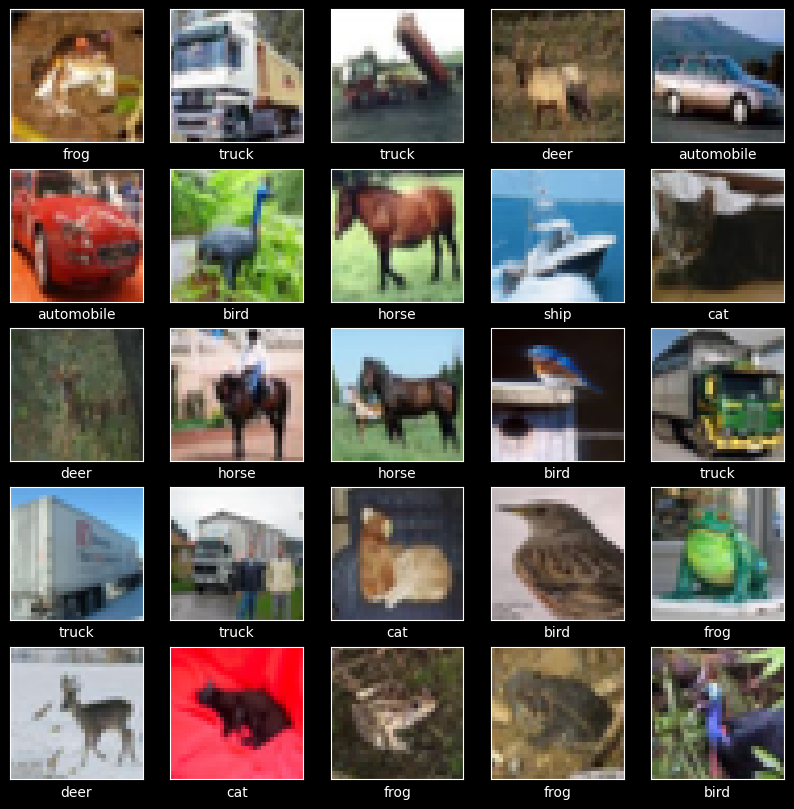

In [16]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]


plt.figure(figsize=(10, 10))

for i in range(25):

    plt.subplot(5, 5, i + 1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)

    plt.imshow(train_images[i], cmap=plt.cm.binary)

    # The CIFAR labels happen to be arrays,

    # which is why you need the extra index

    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

#### Using the Keras Sequential API

We will first build the tf.keras.Sequential model by stacking layers.

In [17]:
# Create the model
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation="linear", input_shape=(32, 32, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.20))
model.add(layers.Conv2D(64, (3, 3), activation="linear"))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.20))
model.add(layers.Conv2D(128, (3, 3), activation="linear"))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.20))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10))

In [18]:
# display the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        1

In [19]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [20]:
history = model.fit(
    train_images, train_labels, epochs=20, validation_data=(test_images, test_labels)
)

Epoch 1/20


1563/1563 [==============================] - 54s 33ms/step - loss: 1.5135 - accuracy: 0.4560 - val_loss: 1.2705 - val_accuracy: 0.5369
Epoch 2/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1750 - accuracy: 0.5805 - val_loss: 1.4096 - val_accuracy: 0.5300
Epoch 3/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0255 - accuracy: 0.6369 - val_loss: 1.1851 - val_accuracy: 0.5864
Epoch 4/20
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9276 - accuracy: 0.6722 - val_loss: 1.2282 - val_accuracy: 0.5882
Epoch 5/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8605 - accuracy: 0.6984 - val_loss: 1.1171 - val_accuracy: 0.6225
Epoch 6/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8003 - accuracy: 0.7182 - val_loss: 1.3040 - val_accuracy: 0.5771
Epoch 7/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7639 - accuracy: 0.7306 - val_loss: 1.0532

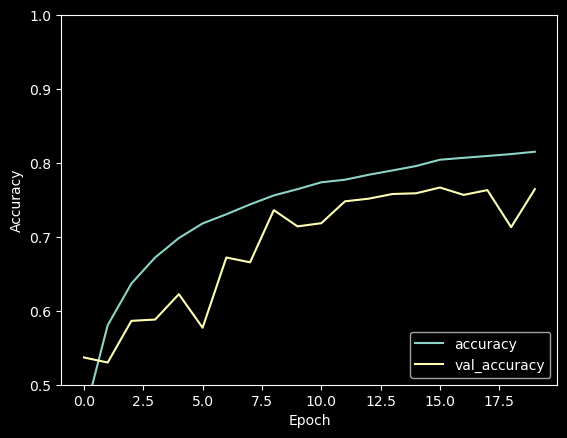

In [21]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.7408 - accuracy: 0.7646 - 3s/epoch - 8ms/step


### Save and Load Models

Save checkpoints during training

In [23]:
# Define a simple sequential model
def create_model():
    model = tf.keras.models.Sequential(
        [
            layers.Conv2D(32, (3, 3), activation="linear", input_shape=(32, 32, 3)),
            layers.LeakyReLU(alpha=0.1),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.20),
            layers.Conv2D(64, (3, 3), activation="linear"),
            layers.LeakyReLU(alpha=0.1),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.20),
            layers.Conv2D(128, (3, 3), activation="linear"),
            layers.LeakyReLU(alpha=0.1),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.20),
            layers.Flatten(),
            layers.Dense(64, activation="relu"),
            layers.Dense(10),
        ]
    )
    model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    return model


# Create a basic model instance
model_A = create_model()

# Display the model's architecture
model_A.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)       

In [24]:
import os


checkpoint_path = "training_1/cp.ckpt"

checkpoint_dir = os.path.dirname(checkpoint_path)


# Create a callback that saves the model's weights

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, save_weights_only=True, verbose=1
)

In [25]:
# Train the model with the new callback
model_A.fit(
    train_images,
    train_labels,
    epochs=20,
    validation_data=(test_images, test_labels),
    callbacks=[cp_callback],
)  # Pass callback to training

Epoch 1/20
1562/1563 [============================>.] - ETA: 0s - loss: 1.4803 - accuracy: 0.4679
Epoch 1: saving model to training_1\cp.ckpt
1563/1563 [==============================] - 55s 33ms/step - loss: 1.4802 - accuracy: 0.4680 - val_loss: 1.2860 - val_accuracy: 0.5551
Epoch 2/20
1563/1563 [==============================] - ETA: 0s - loss: 1.1503 - accuracy: 0.5908
Epoch 2: saving model to training_1\cp.ckpt
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1503 - accuracy: 0.5908 - val_loss: 1.6311 - val_accuracy: 0.4817
Epoch 3/20
1563/1563 [==============================] - ETA: 0s - loss: 1.0153 - accuracy: 0.6397
Epoch 3: saving model to training_1\cp.ckpt
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0153 - accuracy: 0.6397 - val_loss: 1.2220 - val_accuracy: 0.5819
Epoch 4/20
1562/1563 [============================>.] - ETA: 0s - loss: 0.9267 - accuracy: 0.6744
Epoch 4: saving model to training_1\cp.ckpt
1563/1563 [================

This creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch:

In [26]:
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [27]:
# Create a basic model instance
model_B = create_model()

# Evaluate the model
loss, acc = model_B.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 3s - loss: 2.3271 - accuracy: 0.0936 - 3s/epoch - 10ms/step
Untrained model, accuracy:  9.36%


In [28]:
# Loads the weights
model_B.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model_B.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 3s - loss: 0.7223 - accuracy: 0.7631 - 3s/epoch - 9ms/step
Restored model, accuracy: 76.31%


### Load Images

In [29]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

This tutorial uses a dataset of several thousand photos of flowers. The flowers dataset contains 5 sub-directories, one per class:

flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

In [30]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    origin=dataset_url, fname="flower_photos", untar=True
)
data_dir = pathlib.Path(data_dir)

In [31]:
image_count = len(list(data_dir.glob("*/*.jpg")))
print(image_count)

3670


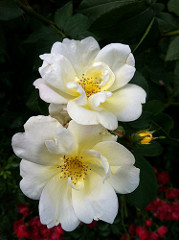

In [32]:
roses = list(data_dir.glob("roses/*"))
PIL.Image.open(str(roses[0]))

#### Create a dataset

In [33]:
batch_size = 32
img_height = 180
img_width = 180

In [34]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [36]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [37]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [38]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [39]:
num_classes = 5

model = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Rescaling(1.0 / 255),
        layers.Conv2D(32, 3, activation="linear"),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.20),
        layers.Conv2D(32, 3, activation="linear"),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.20),
        layers.Conv2D(32, 3, activation="linear"),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.20),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)

model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [40]:
model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
92/92 [==============================] - 69s 718ms/step - loss: 1.9107 - accuracy: 0.4574 - val_loss: 8.6399 - val_accuracy: 0.2480
Epoch 2/20
92/92 [==============================] - 63s 686ms/step - loss: 1.0573 - accuracy: 0.5763 - val_loss: 5.8999 - val_accuracy: 0.2439
Epoch 3/20
92/92 [==============================] - 63s 687ms/step - loss: 0.8598 - accuracy: 0.6594 - val_loss: 3.4164 - val_accuracy: 0.2766
Epoch 4/20
92/92 [==============================] - 62s 677ms/step - loss: 0.7557 - accuracy: 0.6999 - val_loss: 3.0788 - val_accuracy: 0.3338
Epoch 5/20
92/92 [==============================] - 63s 681ms/step - loss: 0.6494 - accuracy: 0.7531 - val_loss: 3.5452 - val_accuracy: 0.3937
Epoch 6/20
92/92 [==============================] - 62s 679ms/step - loss: 0.5487 - accuracy: 0.7861 - val_loss: 2.2290 - val_accuracy: 0.5395
Epoch 7/20
92/92 [==============================] - 62s 679ms/step - loss: 0.4292 - accuracy: 0.8396 - val_loss: 1.8701 - val_accuracy: 0.5736